## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

Mean Body Temp:  98.2492307692
Stnd Dev of Body Temps:  0.730357778905
Min Body Temp: 96.3 100.8
Number of People in Study: 130
CLM:  0.0640566146952


(array([  4.,   6.,  15.,  29.,  27.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

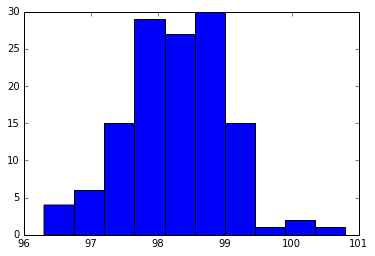

In [4]:
#Question 1)
a = df.temperature
av_body = np.average(a)
dev_body = np.std(a)
min_body = np.min(a)
max_body = np.max(a)
size = len(a)
CLM = dev_body/np.sqrt(size)
print "Mean Body Temp: ", av_body
print "Stnd Dev of Body Temps: ", dev_body
print "Min Body Temp:", min_body,  max_body
print "Number of People in Study:", size
print "CLM: ", CLM
plt.hist(a)

Q1: 
-The distribution of the body temperatures is normal. 
-CLM = 

In [5]:
# Question 2) -Z Test
#Is the true population mean really 98.6 degrees F?
#Bring out the one sample hypothesis test! In this situation,
#is it approriate to apply a z-test or a t-test? How will the result be different?
ZTest = (av_body-98.2)/(dev_body/(130**.5))
print "Z Test Results:", ZTest
print "Mean Body temperature:", av_body

Z Test Results: 0.768550905554
Mean Body temperature: 98.2492307692


In this case the Z-Distribution was used, because we could find the standard deviation; If the sample is less than 30 the distribution will not be normally distributed, causing a T-distrubution. Since the equation for both tests are the same the answer will not vary for this problem. 
-For this problem I used the most current average body temperature.

In [13]:
# Question 3) 
#At what temperature should we consider someone's temperature to be "abnormal"?
#Start by computing the margin of error and confidence interval.
#95% confidence interval, 5% critical Z value = 1.65
M_error = 1.65*(dev_body/np.sqrt(len(a)))
print "Margin of Error:", M_error
alfa = .05
C_P = (1.0-alfa/2.0)
D_F = len(a)-1
C_V = (C_P*dev_body)/np.sqrt(D_F)
#print C_P, dev_body, av_body
#print "Confidence Interval: ", 98.2, "Plus/Minus:", C_V
#print "Confidence Interval:", 98.2 + C_V
print 'Abnormal temp: ', 98.2+(1.65*dev_body)

Margin of Error: 0.105693414247
Confidence Interval: 98.2626968064
Abnormal temp 99.4050903352


3) At what temperature should we consider someone's temperature to be "abnormal"?
-Start by computing the margin of error and confidence interval.
-The 

In [24]:
# Question 4) 
#Is there a significant difference between males and females in normal temperature?
#Set up and solve for a two sample hypothesis testing.
male = df[df.gender == 'M']
male = male.temperature
male_av = np.average(male)
male_dev = np.std(male)
female = df[df.gender == 'F']
female = female.temperature
female_av = np.average(female)
female_dev = np.std(female)
print 'Male Average', male_av
print 'Female Average', female_av
print 'Hypothesis test:', female_av-male_av
print (((female_dev**2/len(female))+(male_dev**2/len(male)))**(1.0/2.0))*1.65

Male Average 98.1046153846
Female Average 98.3938461538
Hypothesis test: 0.289230769231
0.2072015306


Is there a significant difference between males and females in normal temperature?
Set up and solve for a two sample hypothesis testing. 95% Confidence interval, signifigance value of 5%. Assuming that there is no difference in the temperatures for males and females, the hypothesis would be incorrect due to larger number that we got for the actual mean difference. Using 5% signifigance the value of .207 was the make the null hypothesis true, but the value of .289 proves the null hypothesis incorrect.